# Test

Statistiken/Daten:
https://data.oecd.org/ict/internet-access.htm
https://data.oecd.org/hha/household-spending.htm
https://data.oecd.org/broadband/households-with-broadband-access.htm
https://data.oecd.org/eduresource/private-spending-on-education.htm
https://data.oecd.org/eduresource/public-spending-on-education.htm
https://en.wikipedia.org/wiki/List_of_countries_by_number_of_households

Korrelationsmatrix um Märkte zu identifizieren die Deutschland ähnlich sind:

U.a. Normalisierung undabhängiger Variablen (5.)
https://towardsdatascience.com/7-steps-to-run-a-linear-regression-analysis-using-r-d5897a66b835

Linear Regression Model Accurancy
http://www.sthda.com/english/articles/40-regression-analysis/167-simple-linear-regression-in-r/

Correlation Matrix
https://www.displayr.com/how-to-create-a-correlation-matrix-in-r/

Idee 1 - vergleichbare Märkte finden:
Deutschland als Erfolgreicher Mark etabliert, ähnliche Märkte sollen gefunden werden.
Zunächst werden die Faktoren, Parameter bestimmt die für Erfolg/Nicht Erfolg verantwortlich sind.
Faktoren: Internetzugriff, Bildungsausgaben, usw -> Korrelationsmatrix (3D) mit Deutschland als Mittelwert 
                                                                                   andere Länder werden damit verglichen (Varianzanalyse)
                                                                                   wenn Werte zu 95% darin liegen (Nullhypothese, Konfidenzintervall)
Ergebnis: Liste mit 10 Kandidaten (Varianz(-bereich))

Idee 2 - Preisberechnung:
Ausgehen vom Preis in Deutschland von 12€/a wird der Anteil der Haushaltsausgaben in Prozent berechnet:
PercentageApp = AppPrice/((Houshold spendings*ExchangeFactor$€)/(Houshold number))
-> 0,00025%
Für alle 10 Kandidaten nun  AppPrice=0,00025%*(Houshold spendings)

In [1]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Download Dataset from OECD website and store them in data frames

In [2]:
df_internet_access <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.INTERNET.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", header=TRUE)
df_household_spendings <- read.csv("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.HHEXP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", header=TRUE)

In [3]:
#df_internet_access

In [4]:
#df_household_spendings

# Normalize and display Internet Access data set

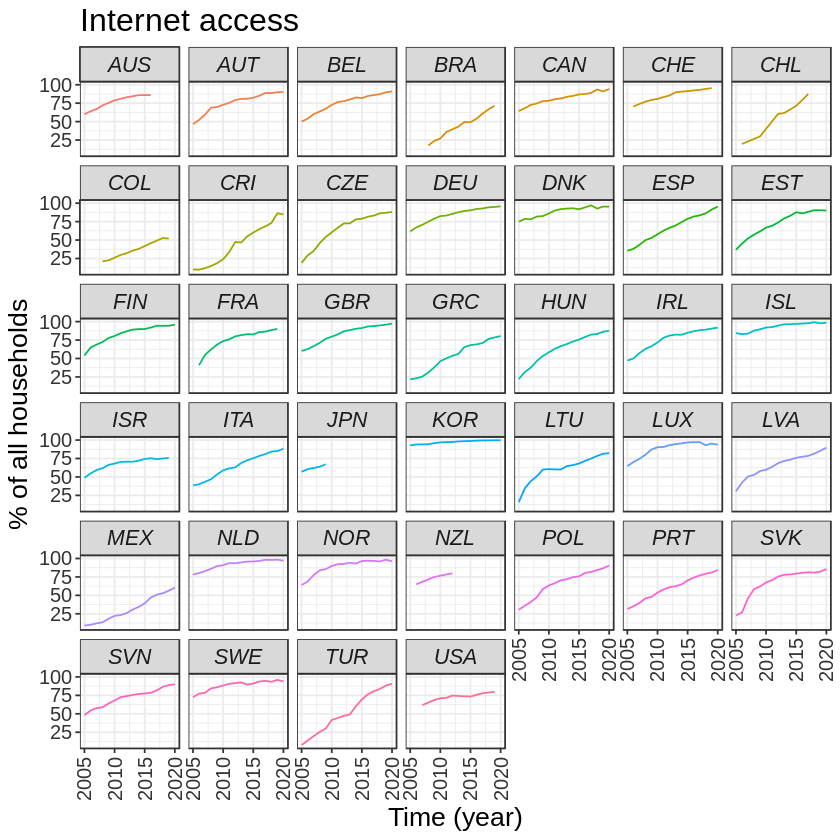

In [5]:
df_internet_access <- df_internet_access[lapply(df_internet_access,length)>0]
#df_internet_access$Value <- (df_internet_access$Value - mean(df_internet_access$Value)) / sd(df_internet_access$Value)

ggplot(data = df_internet_access, mapping = aes(x = TIME, y = Value, color = LOCATION)) +
    geom_line() +
    facet_wrap(vars(LOCATION)) +
    labs(title = "Internet access",
        x = "Time (year)",
        y = "% of all households") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 12),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 16)) +
    theme(legend.position = "none")


# Normalize and display Household Spendings dataset

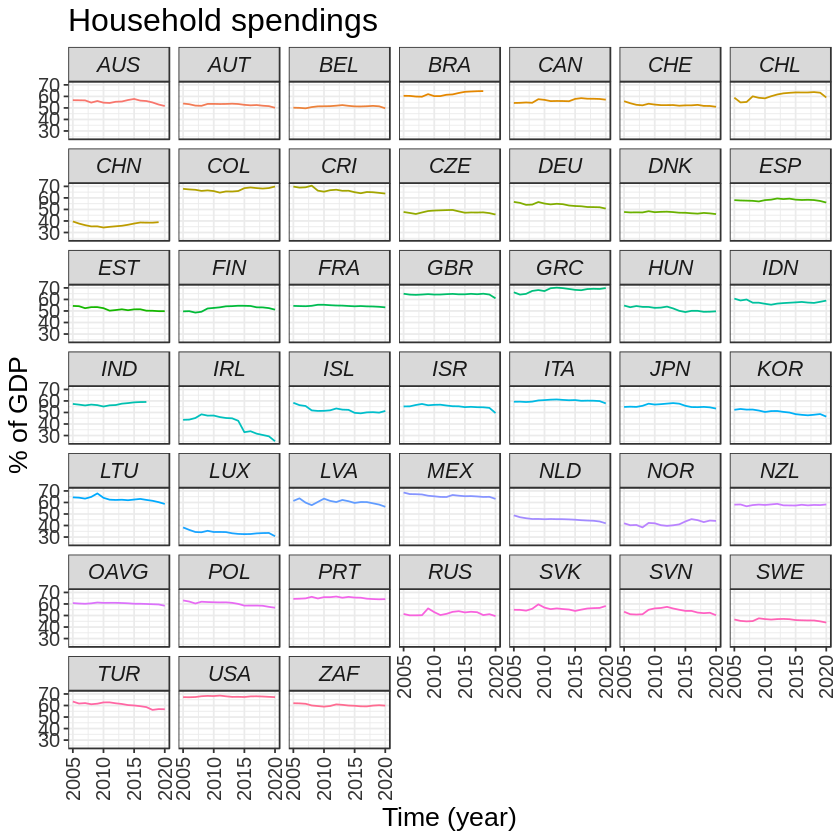

In [6]:
df_household_spendings <- df_household_spendings[lapply(df_household_spendings,length)>0]
#df_household_spendings <- subset(df_household_spendings, MEASURE == 'MLN_USD')
df_household_spendings <- subset(df_household_spendings, MEASURE == 'PC_GDP')
df_household_spendings <- subset(df_household_spendings, SUBJECT == 'TOT')
df_household_spendings <- subset(df_household_spendings, TIME >= 2005)
#df_household_spendings <- subset(df_household_spendings, LOCATION == 'DEU')
df_household_spendings <- subset(df_household_spendings, LOCATION != 'EU' & LOCATION != 'EA')
#df_household_spendings$Value <- log(df_household_spendings$Value)
#df_household_spendings$Value <- (df_household_spendings$Value - min(df_household_spendings$Value)) /(max(df_household_spendings$Value)-min(df_household_spendings$Value))

ggplot(data = df_household_spendings, mapping = aes(x = TIME, y = Value, color = LOCATION)) +
    geom_line() +
    facet_wrap(vars(LOCATION)) +
    labs(title = "Household spendings",
        x = "Time (year)",
        y = "% of GDP") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 12),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 16)) +
    theme(legend.position = "none")

# Perform linear regression and predict Houshold Spendings for 2021 and 2022


Call:
lm(formula = Value ~ TIME, data = df_household_spendings)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3861  -4.2534   0.3745   5.5115  15.4427 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 284.09378  133.32054   2.131   0.0334 *
TIME         -0.11369    0.06625  -1.716   0.0866 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.118 on 712 degrees of freedom
Multiple R-squared:  0.004119,	Adjusted R-squared:  0.002721 
F-statistic: 2.945 on 1 and 712 DF,  p-value: 0.08657


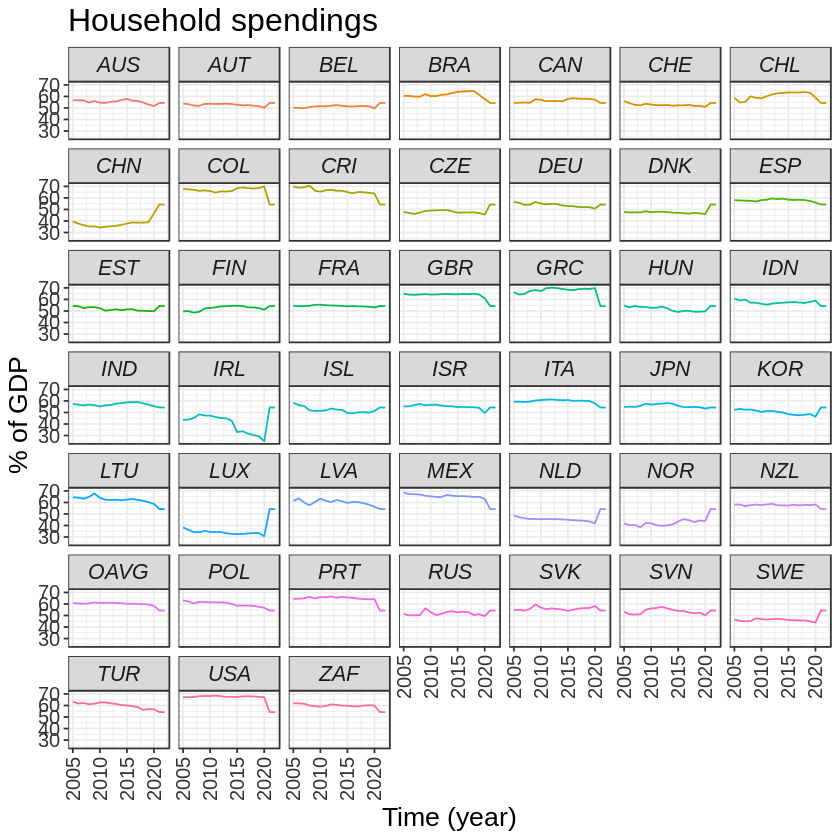

In [7]:
model = lm(Value ~ TIME, data = df_household_spendings) #Create the linear regression
summary(model) #Review the results

LOCATION <- unique(df_household_spendings$LOCATION, incomparables = FALSE)

TIME <- c(2021)
df <- data.frame(LOCATION, INDICATOR='HHEXP', SUBJECT='TOT', MEASURE='PC_GDP', FREQUENCY='A', TIME, Value=0.0, Flag.Codes='')
df$Value <- predict(model, df)
df_household_spendings <- rbind(df_household_spendings, df)

TIME <- c(2022)
df <- data.frame(LOCATION, INDICATOR='HHEXP', SUBJECT='TOT', MEASURE='PC_GDP', FREQUENCY='A', TIME, Value=0.0, Flag.Codes='')
df$Value <- predict(model, df)
df_household_spendings <- rbind(df_household_spendings, df)

#df_household_spendings <- subset(df_household_spendings, TIME >= 2010)
ggplot(data = df_household_spendings, mapping = aes(x = TIME, y = Value, color = LOCATION)) +
    geom_line() +
    facet_wrap(vars(LOCATION)) +
    labs(title = "Household spendings",
        x = "Time (year)",
        y = "% of GDP") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 12),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 16)) +
    theme(legend.position = "none")

# Correlation between Household Spendings (% of GDP) and Internet Access (% of all households)

,COUNTRY,CORR
,<fct>,<dbl>
11,DEU,-0.8076428


,COUNTRY,CORR
,<fct>,<dbl>
29,MEX,-0.7694886
21,ISL,-0.7999600
27,LUX,-0.8111906
33,POL,-0.8366786
30,NLD,-0.8387857
9,CRI,-0.8495067
19,HUN,-0.8692882
14,EST,-0.8884881
38,TUR,-0.8989226


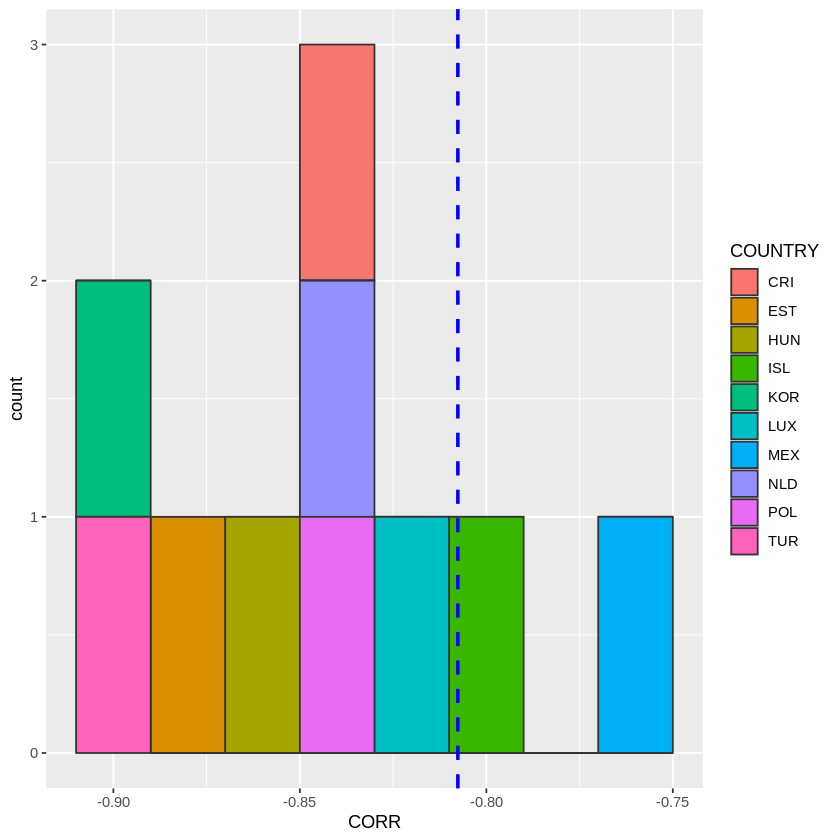

In [200]:
df <- merge(df_household_spendings, df_internet_access,by=c("LOCATION","TIME"))
xx <- data.frame(group = df$LOCATION, a = df$Value.x , b = df$Value.y )

# This returns a "by" object
result <- by(xx[,2:3], xx$group, function(x) {cor(x$b, x$a)})

# You get pretty close to what you want if you coerce it into a data frame via a matrix
result.dataframe <- as.data.frame(as.matrix(result))
result.dataframe <- na.omit(result.dataframe)

result.dataframe <- cbind(newColName = rownames(result.dataframe), result.dataframe)
rownames(result.dataframe) <- 1:nrow(result.dataframe)

colnames(result.dataframe) <- c("COUNTRY","CORR")
result.dataframe <- result.dataframe[order(result.dataframe$CORR,decreasing=TRUE), ]


germany <- result.dataframe[result.dataframe$COUNTRY == 'DEU', ]
germany

result.dataframe <- result.dataframe[result.dataframe$CORR < -0.70 & result.dataframe$CORR > -0.95 & result.dataframe$COUNTRY != 'DEU', ]
result.dataframe
#ggplot(result.dataframe, aes(x=CORR), labels=TRUE) + 
#  geom_histogram(color="black", fill="white", binwidth=0.05) +  
#  stat_bin(binwidth=0.05, geom="text", aes(label=..count..), vjust=-1.5) +
#  geom_vline(aes(xintercept=germany$CORR), color="blue", linetype="dashed", size=1)

ggplot(aes(x = CORR ), data = result.dataframe) + 
  geom_histogram(aes(fill = COUNTRY ), binwidth=0.02, colour="grey20") +
  geom_vline(aes(xintercept=germany$CORR), color="blue", linetype="dashed", size=1)


## correlation coefficients for a set of variables used to determine if a relationship exists between the variables. The coefficient indicates both the strength of the relationship as well as the direction (positive vs. negative correlations)